In [27]:
import matplotlib.pyplot as plt

from erad.models.custom_distributions import Darestani2019
from erad.enums import PoleClass, PoleConstructionMaterial
from erad.quantities import Speed, WindAngle, ConductorArea, PoleAge
from erad.models.asset import DistributionPole

# Plot Darestani2019 fragility curves for wood poles

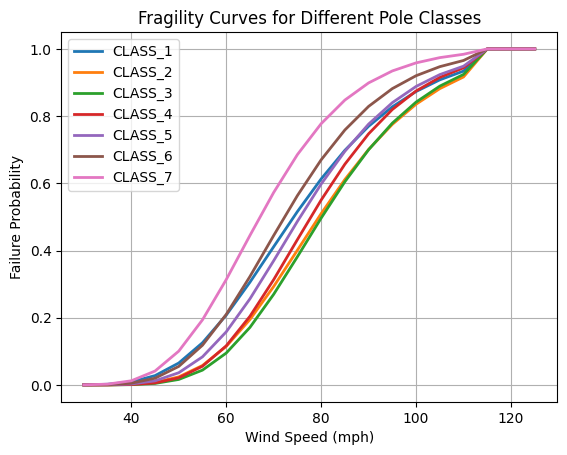

In [28]:

# Create mock DistributionPole instance
asset = DistributionPole.example()
asset.pole_material = PoleConstructionMaterial.WOOD
asset.wind_angle =  WindAngle(90, 'degrees')
asset.conductor_area = ConductorArea(2, 'm^2')
asset.pole_age = PoleAge(50, 'years')

for idx, pole_class in enumerate(PoleClass):
    asset.pole_class = pole_class
    dist_instance = Darestani2019(asset)

    failure_probability = []
    wind_speeds = []
    for wind_speed in range(30, 130, 5):
        wind_speed_ms = Speed(wind_speed, 'mph')
        prob = dist_instance.cdf(wind_speed_ms)
        failure_probability.append(prob)
        wind_speeds.append(wind_speed)

    plt.plot(
    wind_speeds,
    failure_probability,
    label=f'{pole_class.name}',
    linewidth=2)


plt.xlabel('Wind Speed (mph)')
plt.ylabel('Failure Probability')
plt.title('Fragility Curves for Different Pole Classes')
plt.legend()
plt.grid()
plt.show()